In [52]:
import io # ignore this

In [53]:
pwd

'/Users/emiliagan/Downloads'

In [54]:
# Ignore the io.open and the encoding='utf-8'
# These were added to permit my machine to open a dataset generated on a different system
# (although, if you are getting error messages complaining about encoding, you could try this.)

district_list = []
no_access_list = []
percent_pop_list = []
pop_dense_list = []
per_capita_list = []

dataset =[]
source = "broadband_all.csv"

with io.open(source, encoding="utf-8") as f:
    for item in f:
        dataset.append(item.lower().rstrip())

del dataset[0]

for entry in dataset:
    current_data = entry.split(",")
    district_list.append(current_data[0])
    no_access_list.append(current_data[1])
    percent_pop_list.append(current_data[2])
    pop_dense_list.append(current_data[3])
    per_capita_list.append(current_data[4])

all_areas = {}
for i in range(0,len(district_list)):
    current_district_data = {}
    current_key = district_list[i]
    current_district_data["no_access"] = no_access_list[i]
    current_district_data["percent_pop"] = percent_pop_list[i]
    current_district_data["pop_dense"] = pop_dense_list[i]
    current_district_data["per_capita"] = per_capita_list[i]
    all_areas[current_key] = current_district_data           

i = 0
for key in all_areas.keys():
    if i < 5:
        print(key)
        print(all_areas[key])
        i += 1

fairbanks north star borough
{'pop_dense': '14.03', 'per_capita': '32906', 'percent_pop': '16', 'no_access': '16521'}
cape may county
{'pop_dense': '359.38', 'per_capita': '33499', 'percent_pop': '3', 'no_access': '2601'}
guadalupe county
{'pop_dense': '212.86', 'per_capita': '26696', 'percent_pop': '', 'no_access': ''}
dane county
{'pop_dense': '435.28', 'per_capita': '33895', 'percent_pop': '4', 'no_access': '19675'}
minidoka county
{'pop_dense': '23.31', 'per_capita': '20238', 'percent_pop': '38', 'no_access': '6691'}


You can print out the entire dictionary, but since I am planning on having you look at the notebook in GitHub, I want to limit the size of the displayed output.<br><br>
This shows us that the dictionary "all_areas" contains a district name for each __key__ and an associated dictionary of data collected for that district as each __value__.<br><br>
Furthermore, some of the "no_access" fields are blank (contain only an empty string).<br>
Also worth noting: "pop_density" contains float values (currently stored as strings), while the other items are integers (also currently stored as strings). Since we want to plot the data, at some point, we will likely want to convert these to float() and int() types, respectively.

In [55]:
# First find the maximum value
max_value = max(district_density.values()) # maximum value
print(max_value)

73077.08


In [56]:
# Making a new dictionary with just district and pop density value
district_density = {}
for districts in all_areas:
    density = all_areas[districts]["pop_dense"]
    district = districts
    district_density[district] = float(density)  # store as a decimal number instead of a string

# Check the new dictionary -- again, I will just print out the first 5 items:
i = 0
for key in district_density.keys():
    if i < 5:
        print(key, ":", district_density[key])
        i += 1


fairbanks north star borough : 14.03
cape may county : 359.38
guadalupe county : 212.86
minidoka county : 23.31
wabash county : 72.46


In [57]:
# Find the district(s) that has this population density
for key, value in district_density.items():
    if value == max_value:
        print("District: ",key.title(), ", Pop density: ", max_value, sep="")


District: New York County, Pop density: 73077.08


In [58]:
# For plotting pop density vs no access data
# Making a new dictionary with just district and (access, pop density values)
district_data = {}
for districts in all_areas:
    if all_areas[districts]["pop_dense"] != '' and all_areas[districts]["no_access"] != '':
        density = all_areas[districts]["pop_dense"]
        noaccess = all_areas[districts]["no_access"]
        district_data[districts] = (float(density),int(noaccess))  # store as numeric values instead of strings
        # districts missing values for "pop_dense" or "no_access" won't appear in the dictionary

# Check the new dictionary -- you can just use the dictionary name to look at the entire object
# district_data # <- uncomment this to see all the data - and delete the code below
i = 0
for key in district_data.keys():
    if i < 5:
        print(key, ":", district_data[key])
        i += 1

fairbanks north star borough : (14.03, 16521)
cape may county : (359.38, 2601)
minidoka county : (23.31, 6691)
wabash county : (72.46, 11306)
yoakum county : (9.46, 2205)


In [60]:
# Let's sort data by the pop density values
sorted_data = sorted(district_data.items(), key=lambda x: x[1]) 

# This is a method of writing code that we will NOT be covering.
# You can read more about it here: http://www.secnetix.de/olli/Python/lambda_functions.hawk
# Here, it is convenient for us to use for sorting by values in a dictionary.
# The result is a LIST of items, sorted by the "pop_dense" value.

# The following line would print out the entire LIST
#print(sorted_data) 

# Sorting by pop density can help us make a nice LINE PLOT
# notice it is sorted by the first number in the values tuple
for i in range(0,5):
    print(sorted_data[i])

('yukon-koyukuk census area', (0.03, 4530))
('lake and peninsula borough', (0.06, 1514))
('loving county', (0.07, 44))
('yakutat city and borough', (0.07, 568))
('north slope borough', (0.11, 9614))


In [61]:
import numpy as np
import pylab as pl

x_vals = [] # this will be your pop density values
y_vals = [] # this will be your access values


for x in sorted_data:
    x_vals.append(x[1][0]) # Add the first element of the second item (i.e. the first value in the tuple)
    y_vals.append(x[1][1]) # Add the second element of the second item (i.e. the second value in the tuple)



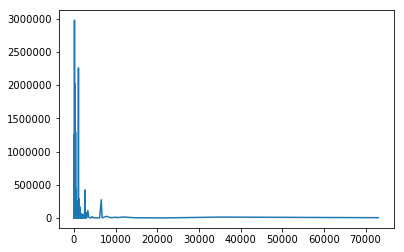

In [62]:
# use pylab to plot x and y
pl.plot(x_vals, y_vals)
# show the plot on the screen
pl.show()

In [63]:
# Say we want to look at the first part of the plot more closely
x_vals_2 = [] # this will be your pop density values
y_vals_2 = [] # this will be your access values

for x in sorted_data:
    if x [1][0] < 10000:
        x_vals_2.append(x[1][0]) # Add the first element of the second item (i.e. the first value in the tuple)
        y_vals_2.append(x[1][1]) # Add the second element of the second item (i.e. the second value in the tuple)



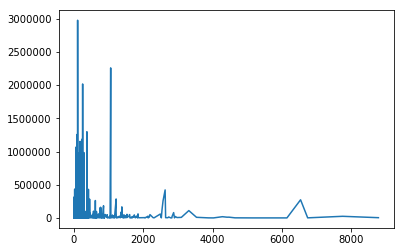

In [64]:
# use pylab to plot x and y
pl.plot(x_vals_2, y_vals_2)
# show the plot on the screen
pl.show()

In [65]:
# Say we want to look at the first part of the plot more closely
x_vals_3 = [] # this will be your pop density values
y_vals_3 = [] # this will be your access values

for x in sorted_data:
    if x [1][0] < 2000:
        x_vals_3.append(x[1][0]) # Add the first element of the second item (i.e. the first value in the tuple)
        y_vals_3.append(x[1][1]) # Add the second element of the second item (i.e. the second value in the tuple)



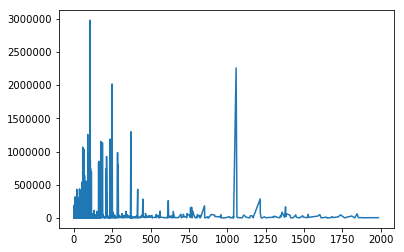

In [66]:
# use pylab to plot x and y
pl.plot(x_vals_3, y_vals_3)
# show the plot on the screen
pl.show()

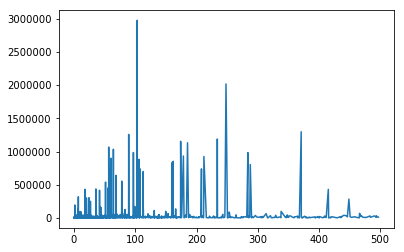

In [67]:
# Say we want to look at the first part of the plot more closely
x_vals_4 = [] # this will be your pop density values
y_vals_4 = [] # this will be your access values

for x in sorted_data:
    if x [1][0] < 500:
        x_vals_4.append(x[1][0]) # Add the first element of the second item (i.e. the first value in the tuple)
        y_vals_4.append(x[1][1]) # Add the second element of the second item (i.e. the second value in the tuple)

# use pylab to plot x and y
pl.plot(x_vals_4, y_vals_4)
# show the plot on the screen
pl.show()

Anyway, we've made the "scrunched up" data in the lower end of the plot easier to see, but I can't say I really see a consistent pattern here, other than after the population density reaches about 4000 (other than the blip near 6000) there are almost no occurrences of "no access" of any significance. And other than the peak just after 1000, most of the large "no access" areas are those where the pop dense is under 500. Under 500, however, my guess is that the height of the peak is more dependent on how many people there are in that district to start with, than how many don't have access (I wouldn't be surprised if none of them have access). It would be more helpful to know what percentage of people in the district have no access, because then it would be easier to compare one district to another.